<a href="https://colab.research.google.com/github/shakilgazi/Cotton-Disease-Prediction-DL-Transfer-Learning-/blob/main/Cotton_Disease_Prediction_DL_(Transfer_Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install -q keras

In [3]:
import keras

In [4]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [5]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [6]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Data/Cotton Disease /train'
valid_path = '/content/drive/MyDrive/Data/Cotton Disease /test'

In [7]:
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94781440/94765736 [==============================] - 0s 0us/step


In [8]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [9]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Data/Cotton Disease /train/*')

In [10]:
len(folders)

4

In [11]:
x = Flatten()(resnet.output)

In [12]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [13]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [14]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Data/Cotton Disease /train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [17]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Data/Cotton Disease /test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [18]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
61/61 [==============================] - 441s 7s/step - loss: 2.2378 - accuracy: 0.4100 - val_loss: 1.6815 - val_accuracy: 0.4444
Epoch 2/20
61/61 [==============================] - 40s 650ms/step - loss: 0.9709 - accuracy: 0.6181 - val_loss: 1.0061 - val_accuracy: 0.6111
Epoch 3/20
61/61 [==============================] - 39s 632ms/step - loss: 0.8979 - accuracy: 0.6315 - val_loss: 0.7219 - val_accuracy: 0.7222
Epoch 4/20
61/61 [==============================] - 39s 634ms/step - loss: 0.8274 - accuracy: 0.6643 - val_loss: 1.1393 - val_accuracy: 0.6111
Epoch 5/20
61/61 [==============================] - 38s 623ms/step - loss: 1.1582 - accuracy: 0.5900 - val_loss: 1.5210 - val_accuracy: 0.5000
Epoch 6/20
61/61 [==============================] - 38s 629ms/step - loss: 0.8817 - accuracy: 0.6586 - val_loss: 1.0308 - val_accuracy: 0.6667
Epoch 7/20
61/61 [==============================] - 38s 619ms/step - loss: 0.7616 - accuracy: 0.6920 - val_loss: 1.1788 - val_accuracy: 0.6111
E

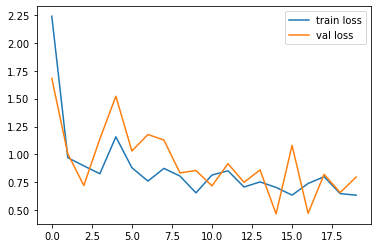

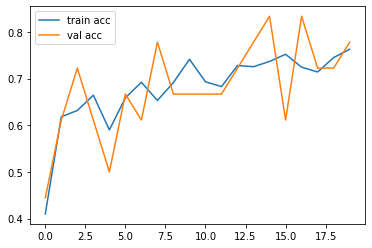

<Figure size 432x288 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [21]:
y_pred = model.predict(test_set)
y_pred


array([[4.32294219e-05, 7.29175210e-02, 1.28553733e-02, 9.14183855e-01],
       [8.04129668e-05, 1.73818558e-01, 5.08777499e-02, 7.75223255e-01],
       [2.80208915e-04, 1.16115674e-01, 6.62156343e-02, 8.17388475e-01],
       [7.92632878e-01, 3.91527374e-06, 1.10055029e-01, 9.73082855e-02],
       [1.94660097e-05, 2.06202836e-04, 9.98470724e-01, 1.30362611e-03],
       [1.01567297e-04, 9.90632296e-01, 1.72106753e-04, 9.09402966e-03],
       [1.35782015e-04, 9.14113343e-01, 4.66188639e-02, 3.91320623e-02],
       [3.85381754e-05, 9.61194928e-06, 4.30629821e-03, 9.95645523e-01],
       [1.35465161e-04, 9.17085946e-01, 2.55474239e-04, 8.25231671e-02],
       [1.99715785e-07, 1.55016807e-07, 9.99950409e-01, 4.92796062e-05],
       [5.70871169e-03, 6.55441523e-01, 6.10740334e-02, 2.77775824e-01],
       [5.98953292e-02, 6.81623578e-01, 6.08433597e-02, 1.97637722e-01],
       [2.06484750e-04, 1.03189808e-03, 9.94606197e-01, 4.15534619e-03],
       [2.38776647e-05, 4.92530319e-07, 9.99971867e

In [22]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [23]:
y_pred

array([3, 3, 3, 0, 2, 1, 1, 3, 1, 2, 1, 1, 2, 2, 3, 2, 1, 1])

In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [25]:
model=load_model('model_resnet50.h5')

In [26]:
img=image.load_img('/content/drive/MyDrive/Data/Cotton Disease /test/diseased cotton leaf/dis_leaf (124).jpg',target_size=(224,224))

In [27]:
x=image.img_to_array(img)
x

array([[[ 86.,  84.,  71.],
        [ 83.,  85.,  72.],
        [ 77.,  75.,  62.],
        ...,
        [116.,  96.,  85.],
        [148., 128., 117.],
        [135., 115., 104.]],

       [[134., 130., 119.],
        [103., 100.,  83.],
        [ 99.,  97.,  84.],
        ...,
        [105.,  88.,  80.],
        [127., 107.,  96.],
        [127., 107.,  96.]],

       [[152., 143., 138.],
        [163., 153., 143.],
        [ 80.,  77.,  60.],
        ...,
        [112.,  95.,  87.],
        [127., 107.,  96.],
        [126., 107.,  93.]],

       ...,

       [[170., 183., 137.],
        [114., 116.,  94.],
        [ 88.,  79.,  74.],
        ...,
        [157., 139., 135.],
        [150., 135., 130.],
        [117., 106., 102.]],

       [[151., 157., 119.],
        [ 99.,  93.,  77.],
        [ 95.,  86.,  81.],
        ...,
        [133., 116., 109.],
        [116., 101.,  94.],
        [121., 110., 106.]],

       [[104.,  97.,  79.],
        [ 99.,  90.,  81.],
        [ 88.,  

In [28]:
x.shape

(224, 224, 3)

In [29]:
x=x/255

In [30]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [31]:
img_data

array([[[[-103.66057 , -116.449585, -123.34274 ],
         [-103.65665 , -116.44566 , -123.35451 ],
         [-103.69587 , -116.48488 , -123.37804 ],
         ...,
         [-103.60567 , -116.40253 , -123.2251  ],
         [-103.48018 , -116.27704 , -123.09961 ],
         [-103.53116 , -116.32802 , -123.15059 ]],

        [[-103.472336, -116.269196, -123.15451 ],
         [-103.61351 , -116.38684 , -123.27608 ],
         [-103.60959 , -116.398605, -123.29176 ],
         ...,
         [-103.625275, -116.4339  , -123.268234],
         [-103.56253 , -116.35939 , -123.18196 ],
         [-103.56253 , -116.35939 , -123.18196 ]],

        [[-103.39783 , -116.218216, -123.08392 ],
         [-103.37822 , -116.179   , -123.04079 ],
         [-103.70371 , -116.477036, -123.36627 ],
         ...,
         [-103.597824, -116.40645 , -123.24078 ],
         [-103.56253 , -116.35939 , -123.18196 ],
         [-103.574295, -116.35939 , -123.18588 ]],

        ...,

        [[-103.40175 , -116.061356, -1

In [32]:
model.predict(img_data)

array([[3.9335296e-02, 9.0021045e-20, 9.6066475e-01, 5.3577998e-19]],
      dtype=float32)

In [33]:
a=np.argmax(model.predict(img_data), axis=1)

In [35]:
if(a==1):
    print("Fresh")
else:
    print("Diseased")

Diseased
